In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [134]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') #Michael's from Rotten Tomatos 
movie_studios = pd.read_csv('zippedData/bom.movie_gross.csv.gz')     #Teigen's from Box Office Mojo 
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')    #Louis' from basics IMDB
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')  #Louis' ratings from IMDB
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')                  #Ely's from TMDB

In [135]:
#Ely's innitial cleaning TMDB 
genres={'28':"Action",
'12':"Adventure",
'16':"Animation",
'35':"Comedy",
'80':"Crime",
'99':"Documentary",
'18':"Drama",
'10751':"Family",
'14':"Fantasy",
'36':"History",
'27':"Horror",
'10402':"Music",
'9648':"Mystery",
'10749':"Romance",
'878':"Science Fiction",
'10770':"TV Movie",
'53':"Thriller",
'10752':"War",
'37':"Western"}

tmdb = tmdb.replace(pd.Series(genres).astype(str), regex=True)
tmdb['genre_ids']=tmdb['genre_ids'].str.strip('[]').str.split(', ')


In [136]:
#IMDB merge
title_master = title_basics.merge(title_ratings, how='inner')

In [137]:
louis_and_ely = tmdb.merge(title_master, how = 'inner')
louis_and_ely

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
3,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,tt0814255,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy",5.9,165108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17800,26509,[Horror],502255,en,Closing Time,0.600,20Drama-02-24,Closing Time,0.0,1,tt8731118,Closing Time,2018,116.0,Documentary,6.4,51
17801,26514,"[Fantasy, Action, Adventure]",381231,en,The Last One,0.600,20Drama-10-01,The Last One,0.0,1,tt2962488,The Last One,2014,80.0,"Documentary,History,News",7.0,26
17802,26514,"[Fantasy, Action, Adventure]",381231,en,The Last One,0.600,20Drama-10-01,The Last One,0.0,1,tt3118968,The Last One,2018,85.0,"Action,Adventure,Fantasy",6.1,15
17803,26515,"[Family, Adventure, Action]",366854,en,Trailer Made,0.600,20Drama-06-22,Trailer Made,0.0,1,tt3377456,Trailer Made,2016,79.0,Adventure,4.3,25


In [138]:
louis_and_ely_and_teigen = louis_and_ely.merge(movie_studios, how = 'inner')


In [139]:
let = louis_and_ely_and_teigen.drop(['domestic_gross', 'foreign_gross'], axis = 1)
let

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,year
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299,P/DW,2010
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,BV,2010
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511,Uni.,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,24778,[Drama],484428,sv,Unga Astrid,4.734,20Drama-11-23,Becoming Astrid,7.4,28,tt6433456,Becoming Astrid,2018,123.0,"Biography,Drama",7.2,2497,MBox,2018
2832,24916,[Drama],473262,it,"Nico, 1988",3.789,20Drama-07-04,"Nico, 1988",7.3,40,tt7186092,"Nico, 1988",2017,93.0,"Biography,Drama,Music",6.8,1007,Magn.,2018
2833,25037,[Documentary],465871,en,Maria by Callas,3.184,20Drama-11-02,Maria by Callas,7.6,11,tt7364566,Maria by Callas,2017,119.0,"Biography,Documentary,Music",7.2,867,SPC,2018
2834,25148,"[Action, Adventure, Animation]",332718,en,Bilal: A New Breed of Hero,2.707,20Drama-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,VE,2018


In [140]:
let = louis_and_ely_and_teigen.drop(['domestic_gross', 'foreign_gross'], axis = 1)
let

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,year
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299,P/DW,2010
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,BV,2010
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511,Uni.,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,24778,[Drama],484428,sv,Unga Astrid,4.734,20Drama-11-23,Becoming Astrid,7.4,28,tt6433456,Becoming Astrid,2018,123.0,"Biography,Drama",7.2,2497,MBox,2018
2832,24916,[Drama],473262,it,"Nico, 1988",3.789,20Drama-07-04,"Nico, 1988",7.3,40,tt7186092,"Nico, 1988",2017,93.0,"Biography,Drama,Music",6.8,1007,Magn.,2018
2833,25037,[Documentary],465871,en,Maria by Callas,3.184,20Drama-11-02,Maria by Callas,7.6,11,tt7364566,Maria by Callas,2017,119.0,"Biography,Documentary,Music",7.2,867,SPC,2018
2834,25148,"[Action, Adventure, Animation]",332718,en,Bilal: A New Breed of Hero,2.707,20Drama-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,VE,2018


In [141]:
movie_budgets_df = movie_budgets_df.rename(columns={'movie':'title'})

In [142]:
master_unclean = let.merge(movie_budgets_df, on = 'title', how = 'inner')
master_unclean

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,genres,averagerating,numvotes,studio,year,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Action,Adventure,Animation",8.1,611299,P/DW,2010,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,...,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,"Adventure,Animation,Comedy",8.3,682218,BV,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,"Animation,Comedy,Family",7.7,464511,Uni.,2010,50,"Jul 9, 2010","$69,000,000","$251,513,985","$543,464,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,24089,"[Drama, History, Thriller]",453201,en,The 15:17 to Paris,11.576,20Drama-02-09,The 15:17 to Paris,5.3,799,...,"Biography,Drama,Thriller",5.2,21880,WB,2018,23,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,24120,[Comedy],474335,en,Uncle Drew,10.836,20Drama-06-29,Uncle Drew,6.5,220,...,"Comedy,Sport",5.7,9739,LG/S,2018,85,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,24168,"[Crime, Drama, History, Thriller]",339103,en,Gotti,10.034,20Drama-06-15,Gotti,5.2,231,...,"Biography,Crime,Drama",4.8,10358,VE,2018,64,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,24212,"[Thriller, Action, Crime]",442064,en,Proud Mary,9.371,20Drama-01-Adventure,Proud Mary,5.5,259,...,"Action,Crime,Drama",4.9,6805,SGem,2018,50,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [143]:
master_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1664
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1665 non-null   int64  
 1   genre_ids          1665 non-null   object 
 2   id_x               1665 non-null   int64  
 3   original_language  1665 non-null   object 
 4   original_title     1665 non-null   object 
 5   popularity         1665 non-null   float64
 6   release_date_x     1665 non-null   object 
 7   title              1665 non-null   object 
 8   vote_average       1665 non-null   float64
 9   vote_count         1665 non-null   int64  
 10  tconst             1665 non-null   object 
 11  primary_title      1665 non-null   object 
 12  start_year         1665 non-null   int64  
 13  runtime_minutes    1631 non-null   float64
 14  genres             1659 non-null   object 
 15  averagerating      1665 non-null   float64
 16  numvotes           1665 

In [144]:
master_unclean['vote_count'].describe()

count     1665.000000
mean      2162.216216
std       2876.171747
min          1.000000
25%        353.000000
50%       1098.000000
75%       2715.000000
max      22186.000000
Name: vote_count, dtype: float64

In [145]:
run_time = master_unclean.loc[(master_unclean['runtime_minutes'] > 30) & (master_unclean['runtime_minutes'] < 180)]
run_time

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,genres,averagerating,numvotes,studio,year,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,"Action,Adventure,Animation",8.1,611299,P/DW,2010,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,"Action,Adventure,Sci-Fi",7.0,657690,Par.,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-Animation,Inception,8.3,22186,...,"Action,Adventure,Sci-Fi",8.8,1841066,WB,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,7,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,"Adventure,Animation,Comedy",8.3,682218,BV,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,"Animation,Comedy,Family",7.7,464511,Uni.,2010,50,"Jul 9, 2010","$69,000,000","$251,513,985","$543,464,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,24089,"[Drama, History, Thriller]",453201,en,The 15:17 to Paris,11.576,20Drama-02-09,The 15:17 to Paris,5.3,799,...,"Biography,Drama,Thriller",5.2,21880,WB,2018,23,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,24120,[Comedy],474335,en,Uncle Drew,10.836,20Drama-06-29,Uncle Drew,6.5,220,...,"Comedy,Sport",5.7,9739,LG/S,2018,85,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,24168,"[Crime, Drama, History, Thriller]",339103,en,Gotti,10.034,20Drama-06-15,Gotti,5.2,231,...,"Biography,Crime,Drama",4.8,10358,VE,2018,64,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,24212,"[Thriller, Action, Crime]",442064,en,Proud Mary,9.371,20Drama-01-Adventure,Proud Mary,5.5,259,...,"Action,Crime,Drama",4.9,6805,SGem,2018,50,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [146]:
less_columns = master_unclean.drop(['Unnamed: 0', 'id_x', 'original_title', 'tconst', 'start_year', 'id_y', 'genres', 'release_date_x', 'primary_title'], axis = 1)

In [147]:
less_columns

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,year,release_date_y,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",en,28.734,How to Train Your Dragon,7.7,7610,98.0,8.1,611299,P/DW,2010,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,"[Adventure, Action, Science Fiction]",en,28.515,Iron Man 2,6.8,12368,124.0,7.0,657690,Par.,2010,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,"[Action, Science Fiction, Adventure]",en,27.920,Inception,8.3,22186,148.0,8.8,1841066,WB,2010,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,"[Animation, Family, Comedy]",en,24.445,Toy Story 3,7.7,8340,103.0,8.3,682218,BV,2010,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
4,"[Animation, Family, Comedy]",en,23.673,Despicable Me,7.2,10057,95.0,7.7,464511,Uni.,2010,"Jul 9, 2010","$69,000,000","$251,513,985","$543,464,573"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,"[Drama, History, Thriller]",en,11.576,The 15:17 to Paris,5.3,799,94.0,5.2,21880,WB,2018,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,[Comedy],en,10.836,Uncle Drew,6.5,220,103.0,5.7,9739,LG/S,2018,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,"[Crime, Drama, History, Thriller]",en,10.034,Gotti,5.2,231,112.0,4.8,10358,VE,2018,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,"[Thriller, Action, Crime]",en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,2018,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [148]:
less_columns=less_columns.loc[less_columns['year'] >= 2016]

In [149]:
less_columns=less_columns.drop(['year'], axis=1)

In [150]:
less_columns

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross
195,"[Comedy, Animation]",en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017","$5,000,000","$176,040,665","$255,367,951"
196,"[Mystery, Thriller, Horror]",en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017","$5,000,000","$176,040,665","$255,367,951"
435,"[Action, Animation]",en,2.058,Black Panther,5.1,11,134.0,7.3,516148,BV,"Feb 16, 2018","$200,000,000","$700,059,566","$1,348,258,224"
436,"[Action, Adventure, Fantasy, Science Fiction]",en,44.140,Black Panther,7.4,12365,134.0,7.3,516148,BV,"Feb 16, 2018","$200,000,000","$700,059,566","$1,348,258,224"
438,[Comedy],en,0.725,Snatched,3.5,2,81.0,5.5,61,Fox,"May 12, 2017","$42,000,000","$45,852,178","$57,852,177"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,"[Drama, History, Thriller]",en,11.576,The 15:17 to Paris,5.3,799,94.0,5.2,21880,WB,"Feb 9, 2018","$30,000,000","$36,276,286","$56,096,200"
1661,[Comedy],en,10.836,Uncle Drew,6.5,220,103.0,5.7,9739,LG/S,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1662,"[Crime, Drama, History, Thriller]",en,10.034,Gotti,5.2,231,112.0,4.8,10358,VE,"Jun 15, 2018","$10,000,000","$4,286,367","$6,089,100"
1663,"[Thriller, Action, Crime]",en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018","$30,000,000","$20,868,638","$21,709,539"


In [151]:
#clean up budget and gross numbers, add the return on investment column
less_columns['production_budget'] = less_columns['production_budget'].str.replace(',', '')
less_columns['production_budget'] = less_columns['production_budget'].str.replace('$', '')
less_columns['production_budget'] = less_columns['production_budget'].astype(int)
less_columns['domestic_gross'] = less_columns['domestic_gross'].str.replace(',', '').str.replace('$', '')
less_columns['domestic_gross'] = less_columns['domestic_gross'].astype(int)
less_columns['worldwide_gross'] = less_columns['worldwide_gross'].str.replace(',', '').str.replace('$', '')
less_columns['worldwide_gross'] = less_columns['worldwide_gross'].astype(int)
less_columns['total_gross'] = less_columns['domestic_gross'] + less_columns['worldwide_gross']
less_columns['ROI'] = (less_columns['total_gross'] / less_columns['production_budget']) * 100

<ipython-input-151-44c48d5d3ab2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  less_columns['production_budget'] = less_columns['production_budget'].str.replace('$', '')
<ipython-input-151-44c48d5d3ab2>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  less_columns['domestic_gross'] = less_columns['domestic_gross'].str.replace(',', '').str.replace('$', '')
<ipython-input-151-44c48d5d3ab2>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  less_columns['worldwide_gross'] = less_columns['worldwide_gross'].str.replace(',', '')

In [152]:
less_columns.groupby(['studio'], sort = True).max()

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
studio,,,,,,,,,,,,,,,
A24,"[Horror, Mystery, Thriller]",en,26.185,The Florida Project,7.4,3866,163.0,7.6,177677,"Sep 30, 2016",10000000,48958273,78610769,127569042,4364.580000
Affirm,[History],en,12.005,"Paul, Apostle of Christ",7.1,98,108.0,6.7,5662,"Mar 23, 2018",5000000,17547999,25529498,43077497,861.549940
Amazon,"[Horror, Fantasy]",en,16.925,Suspiria,7.0,752,152.0,6.8,37360,"Oct 26, 2018",20000000,2483472,7034615,9518087,47.590435
Annapurna,"[Thriller, Science Fiction, Action, Adventure]",en,20.125,Vice,7.2,1213,132.0,7.2,72855,"Dec 25, 2018",60000000,47836282,70883171,118719453,289.791167
BBC,"[Music, Documentary]",fr,0.600,They Will Have to Kill Us First,5.0,1,100.0,7.3,112,"Mar 4, 2016",600000,0,7943,7943,1.323833
BG,"[Thriller, Horror, Mystery]",en,11.787,Wish Upon,6.6,2005,127.0,7.0,72359,"Jun 24, 2016",47500000,15436808,23477345,37778850,314.823750
BH Tilt,"[Horror, Thriller]",en,21.413,Upgrade,7.4,1326,100.0,8.8,104978,"May 13, 2016",5000000,11977130,16553285,28530415,2530.133300
BST,"[Horror, Thriller]",en,16.316,Unsane,7.1,1627,141.0,7.4,105966,"Sep 30, 2016",30000000,27778642,44264271,72042913,1462.331667
BV,"[Fantasy, Family, Comedy]",en,80.773,Zootopia,8.3,14000,149.0,8.5,670926,"Sep 23, 2016",300000000,700059566,2048134200,2726949682,1024.158895


In [153]:
exploded = less_columns.explode('genre_ids', ignore_index=False)

In [154]:
exploded.reset_index()

,index,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
0,195,Comedy,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
1,195,Animation,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
2,196,Mystery,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
3,196,Thriller,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
4,196,Horror,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1663,Action,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257
1295,1663,Crime,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257
1296,1664,Action,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573
1297,1664,Adventure,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573


In [155]:
exploded['release_date_y'].values[0][0:3]

'Feb'

In [156]:
exploded['month'] = exploded['release_date_y'].str[0:3]

In [157]:
exploded

,genre_ids,original_language,popularity,title,vote_average,vote_count,runtime_minutes,averagerating,numvotes,studio,release_date_y,production_budget,domestic_gross,worldwide_gross,total_gross,ROI,month
195,Comedy,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
195,Animation,en,0.834,Get Out,5.5,8,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
196,Mystery,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
196,Thriller,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
196,Horror,en,24.739,Get Out,7.5,8760,104.0,7.7,400474,Uni.,"Feb 24, 2017",5000000,176040665,255367951,431408616,8628.172320,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Action,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257,Jan
1663,Crime,en,9.371,Proud Mary,5.5,259,89.0,4.9,6805,SGem,"Jan 12, 2018",30000000,20868638,21709539,42578177,141.927257,Jan
1664,Action,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573,Feb
1664,Adventure,en,2.707,Bilal: A New Breed of Hero,6.8,54,105.0,8.0,16854,VE,"Feb 2, 2018",30000000,490973,648599,1139572,3.798573,Feb


In [158]:
month = exploded['month']

In [159]:
month.value_counts().index

Index(['Nov', 'Dec', 'Jun', 'Jan', 'Jul', 'Sep', 'Apr', 'Oct', 'Feb', 'Aug',
       'Mar', 'May'],
      dtype='object')

In [160]:
exploded['genre_ids'].value_counts

<bound method IndexOpsMixin.value_counts of 195        Comedy
195     Animation
196       Mystery
196      Thriller
196        Horror
          ...    
1663       Action
1663        Crime
1664       Action
1664    Adventure
1664    Animation
Name: genre_ids, Length: 1299, dtype: object>

In [161]:
month_genre_roi_title = exploded.drop(['original_language', 'popularity', 'vote_average', 'vote_count',\
                                      'runtime_minutes', 'averagerating', 'numvotes', 'studio', \
                                      'production_budget', 'domestic_gross', 'worldwide_gross',\
                                      'total_gross'], axis=1)

In [162]:
month_genre_roi_title

,genre_ids,title,release_date_y,ROI,month
195,Comedy,Get Out,"Feb 24, 2017",8628.172320,Feb
195,Animation,Get Out,"Feb 24, 2017",8628.172320,Feb
196,Mystery,Get Out,"Feb 24, 2017",8628.172320,Feb
196,Thriller,Get Out,"Feb 24, 2017",8628.172320,Feb
196,Horror,Get Out,"Feb 24, 2017",8628.172320,Feb
...,...,...,...,...,...
1663,Action,Proud Mary,"Jan 12, 2018",141.927257,Jan
1663,Crime,Proud Mary,"Jan 12, 2018",141.927257,Jan
1664,Action,Bilal: A New Breed of Hero,"Feb 2, 2018",3.798573,Feb
1664,Adventure,Bilal: A New Breed of Hero,"Feb 2, 2018",3.798573,Feb


In [163]:
mean_roi_by_month = month_genre_roi_title.groupby(['month','genre_ids']).mean()

In [193]:
mean_roi_by_month.head()

ROI
month genre_ids             
Apr   Action     1822.251996
      Adventure   413.864014
      Animation   404.331447
      Comedy      486.651423
      Crime       230.322496

In [188]:
sum_roi_by_month = month_genre_roi_title.groupby(['month','genre_ids']).sum()

In [167]:
# mean_roi_by_month.subgroups

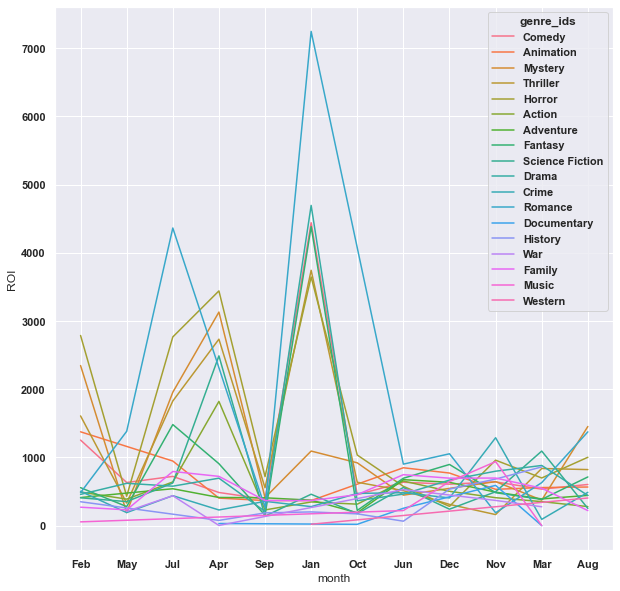

In [174]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
sns.lineplot(x="month", y="ROI", hue="genre_ids", data=month_genre_roi_title , ci=None);


In [131]:
month_genre_roi_title

,genre_ids,title,release_date_y,ROI,month
195,Comedy,Get Out,"Feb 24, 2017",8628.172320,Feb
195,Animation,Get Out,"Feb 24, 2017",8628.172320,Feb
196,Mystery,Get Out,"Feb 24, 2017",8628.172320,Feb
196,Thriller,Get Out,"Feb 24, 2017",8628.172320,Feb
196,Horror,Get Out,"Feb 24, 2017",8628.172320,Feb
...,...,...,...,...,...
1663,Action,Proud Mary,"Jan 12, 2018",141.927257,Jan
1663,Crime,Proud Mary,"Jan 12, 2018",141.927257,Jan
1664,Action,Bilal: A New Breed of Hero,"Feb 2, 2018",3.798573,Feb
1664,Adventure,Bilal: A New Breed of Hero,"Feb 2, 2018",3.798573,Feb
